![xkcd](https://imgs.xkcd.com/comics/machine_learning_2x.png)

_____

# Linear Algebra Homework

_____


### Problem 1: Interpolation versus Regression (5 points)

In your own words, describe the difference between regression and interpolation using the language of linear algebra. Does linear algebra provide an approach to extrapolation? Why or why not? 

Regression is the process of finding the line of best fit. Interpolation is the process of using the line of best fit to estimate the value of one variable from the value of another, provided that the value you are using is within the range of your data. If it's outside the range, then you would be using Extrapolation.
Regression is about finding a general trend in how the data is behaving over the x axis. Interpolation is finding the perfect function that covers all the data points in the 
dataset. Interpolation is fitting a curve through all the data points. 
Regression is used when we have more data points than the parameters in the model, typically in cases where data points do not lie exactly on a single line or curve due to noise or inherent variability. The objective of regression is to find an "optimal" fit that minimizes some form of error, often by minimizing the squared distance between the data points and the fit function (e.g., least-squares regression).

$$\textbf{Linear Algebraic Formulation of Interpolation vs. Regression}$$

$$\text{Given data points: } \{(x_i, y_i)\}_{i=1}^n$$

$$\textbf{Linear Interpolation:}$$
$$\begin{align*}
X\beta &= y \\
\text{where: } X &= \begin{bmatrix} 
1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{n-1}
\end{bmatrix} \\
\beta &= \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{n-1} \end{bmatrix}, \;
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
\end{align*}$$

$$\text{Exact solution when } X \text{ is square and invertible: } \beta = X^{-1}y$$

$$\textbf{Linear Regression:}$$
$$\begin{align*}
\min_\beta \|X\beta - y\|_2^2 &= \min_\beta (X\beta - y)^T(X\beta - y) \\
\text{where: } X &= \begin{bmatrix} 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix} \\
\beta &= \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \;
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
\end{align*}$$

$$\text{Normal equations solution: } \beta = (X^TX)^{-1}X^Ty$$

$$\textbf{Key Differences:}$$
$$\begin{align*}
\text{Interpolation: } & \text{Number of parameters } = \text{Number of points} \\
& \dim(\beta) = n \\
\\
\text{Regression: } & \text{Number of parameters } < \text{Number of points} \\
& \dim(\beta) < n
\end{align*}$$

$$\textbf{Matrix Properties:}$$
$$\begin{align*}
\text{Interpolation: } & X \text{ is } n \times n \text{ (square matrix)} \\
\text{Regression: } & X \text{ is } n \times p \text{ where } p < n \text{ (rectangular matrix)}
\end{align*}$$

$$\textbf{Error Metrics:}$$
$$\begin{align*}
\text{Interpolation Error: } & e = 0 = X\beta - y \\
\text{Regression Error: } & e = X\beta - y \neq 0 \text{ (minimized)} \\
& e^Te = \|X\beta - y\|_2^2 \text{ is minimized}
\end{align*}$$

This formulation highlights how both methods can be understood through matrix operations, with interpolation seeking an exact solution to a square system and regression finding an optimal solution to an overdetermined system via least squares.

AI tool: Chatgpt

____

### Problem 2: Polynomial Regression (10 points)

We have learned that linear regression refers to fitting data to a model in which the weights appear linearly. But, the model itself need not use linear functions. The Gaussian RBFs we used were an example of that. Another very common choice is that of a polynomial. Let's code two cases in which the number of weights is and is not the same as the number of data points.

We wish to model our data with a polynomial. The data you are given is:
$$x = [-2, -0.5, 0, 1] ,$$
$$y = [0, 0.9375, 1, 3] .$$
Because you have four data points, you are tempted to use a model with four parameters, such as:
$$y = w_0 + w_1x + w_2x^2 + w_3x^3 .$$
But, you are also worried that the data may be noisy so you **also** want to fit it to only three weights. You decide that the $x^3$ term could cause large excursions that might follow the noise, so your second model is:
$$y = w_0 + w_1x + w_2x^2.$$

Using only libraries from `linalg`, fit the data to both models. Plot the data and the two resulting models.

As we have seen, the coding for this is trivial - the hard part is setting up the vectors and matrices. Slow down and be sure you understand what you are doing: this will help you set up the problem so that it is very easy. I'll give you a hint:
$$\underbrace{\begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix}}_{4\times 1} = \underbrace{\begin{bmatrix} 0\\0.09375\\1\\3\end{bmatrix}}_{4\times 1} =\underbrace{\begin{bmatrix} 1 & -2 & 4 & 8 \\ 1 & -0.5 & 0.25 & 0.125 \\\vdots  \end{bmatrix}}_{4\times 4}\underbrace{\begin{bmatrix} w_0\\w_1\\w_2\\w_3\end{bmatrix}}_{4\times 1}.$$
It is crucial that you know where this came from!! Explain in a markdown cell where I got these numbers from.

You then use Python to get the weight vector ${\bf w}$, which allows you to plot the resulting polynomial. In one case you will need to use the pseudoinverse, [the `pinv` function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html), or in [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv), because you have more data points than weights.

If you write your code in a general way, it is easy to implement the third model:
$$y = w_0 + w_1x.$$
Do that next.

In the world of machine learning, we would need to figure out which of these three models is the "best", a process called "_model selection_". We won't worry about it now, but I wanted you to at least be aware of the idea. A second idea I'll introduce here is "_regularization_", since it is connected. Regularization is penalizing weights that cause large excursions; here, we are doing this by hand by dropping the higher-order terms (e.g., setting $w_3=0$), thereby prohibiting predictions with large excursions.  There are very powerful techniques for automating this. There is a lot to learn from this problem other than just setting up regression problems and inverting a matrix! 🤓 In a markdown cell, comment on which model you think is best based on your plot(s) and explain your reasons. (If you take a machine learning course, you will learn powerful mathematical methods to make this judgement.)


The numbers that were given to solve is a sample dataset. The left hand side contains y values as given. The right hand side contains the values of functions of x which is the input data. The first column contains x riased to power 0, second column is x raised to 1, third is x raised to 2. The weight matrix contains just the same number of rows as the number of functions of x, ie 3. The equations given were broken down to fit into matrices to solve for the weight matrix.

In [42]:
import numpy as np

x = np.array([-2, -0.5, 0, 1])
y = np.array([0, 0.9375, 1, 3])

def generic(params):
    # Initialize the design matrix within the function
    li = [[1] * len(x)]  # Start with the column of ones for x^0 terms
    for i in range(1, params):
        r = [val ** i for val in x]
        li.append(r)
    
    # Calculate the weights using the pseudoinverse
    X = np.array(li).transpose()  # Transpose to get the correct design matrix
    w = np.linalg.pinv(X) @ y

    # Generate polynomial values for plotting
    x_vals = np.linspace(-2.5, 1.5, 100)
    y_vals = np.zeros_like(x_vals)
    for i in range(params):
        y_vals += w[i] * x_vals**i  # Accumulate terms of the polynomial
    
    return y_vals

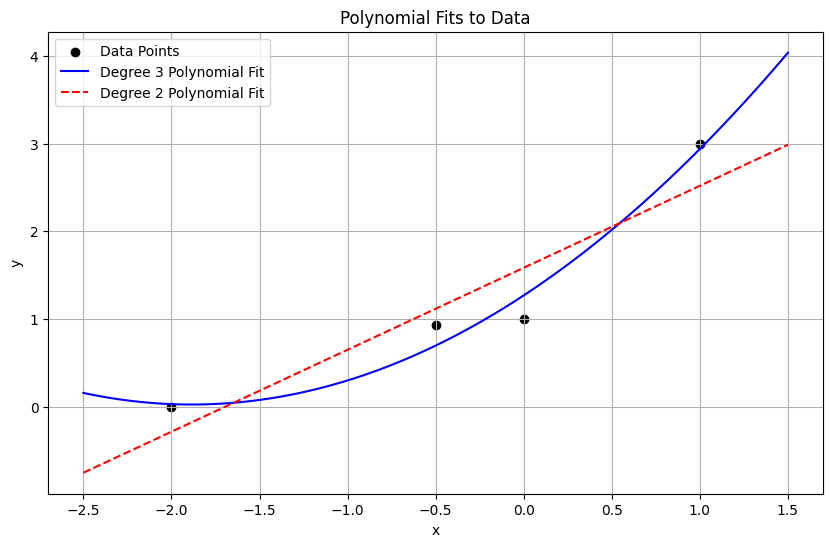

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Data Points')
y_vals2=generic(2)
y_vals3=generic(3)
plt.plot(x_vals, y_vals3, label='Degree 3 Polynomial Fit', color='blue')
plt.plot(x_vals, y_vals2, label='Degree 2 Polynomial Fit', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Fits to Data')
plt.grid(True)
plt.show()

____

### Problem 3: Inverting a Matrix By Hand (10 points)

I mentioned in class that we will mostly rely on Python libraries for performing linear algebra operations. Why not, isn't that why they were developed?!

However, it is also good practice to know how to do these by yourself for the simplest cases. This allows you to explore ideas without a computer and build your intuition for what the libraries are doing. We'll learn here how to invert a $2\times 2$ matrix by hand. Being able to do this by hand also gives you a test case to ensure you are using the Python libraries correctly.

Follow these steps:
1. Make a $2\times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d\end{bmatrix}$ using a NumPy array (you might want to try several choices); if you don't know about these already, NumPy has [some nice functionality for creating arrays](https://numpy.org/doc/stable/user/basics.creation.html), which can be matrices, of various types.
2. Find the [determinant](https://en.wikipedia.org/wiki/Determinant) of your matrix, using:
$$ \mathrm{det}(A) = ad - cb.$$
Do this by hand, not with a library.
3. Form the inverse $A^{-1}$ with
$$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{bmatrix} d & -b \\ -c & a\end{bmatrix}.$$
Show all of your steps using $\LaTeX$ in a markdown cell.
4. Now that you have $A^{-1}$, use the rules of matrix multiplication to find the product $A^{-1}A$. Show your steps.
5. Vary the matrix $A$ and comment on anything interesting you see. For example, what would $A$ look like if its determinant were $0$? For example, make a matrix for which $b=2a$ and $d = 2c$. What does this case correspond to?

Case 1: 


$A = \begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$
The inverse $A^{-1}$ 

$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{bmatrix} d & -b \\ -c & a\end{bmatrix}$ = $\frac{1}{-2}\begin{bmatrix} 4 & -2 \\ -3 & 1\end{bmatrix}$

$A^{-1} = \begin{bmatrix} -2 & 1 \\ 1.5 & 0.5\end{bmatrix}$

$AA^{-1} = \begin{bmatrix} -2 & 1 \\ 1.5 & 0.5\end{bmatrix} * \begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix} = \begin{bmatrix} -2*1+3*1 & -2*2+4*1 \\ 1.5+3*0.5 & 1.5*2-0.5*4\end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$

Case 2: For det(A) = 0:

The determinant is given by $ad - bc = 0$
This means: $ad = bc$
Here's one simple example:
$$A = \begin{bmatrix} 2 & 4 \\ 1 & 2 \end{bmatrix}$$
We can verify: $2(2) - 4(1) = 4 - 4 = 0$
This is a singular matrix where one row is a scalar multiple of the other. In this case, row 2 is $\frac{1}{2}$ times row 1.
Case 2: For $b = 2a$ and $d = 2c$:
$$A = \begin{bmatrix} a & 2a \\ c & 2c \end{bmatrix}$$
Let's calculate the determinant:
$$\det(A) = a(2c) - (2a)(c) = 2ac - 2ac = 0$$

This is an interesting case! When $b = 2a$ and $d = 2c$, the matrix automatically has a determinant of zero. This means:

The columns are linearly dependent
Each column is a scalar multiple of the other (in this case, column 2 is twice column 1)
The matrix transformation maps all vectors onto a line
The matrix is not invertible

Here's a concrete example:
$$A = \begin{bmatrix} 3 & 6 \\ 2 & 4 \end{bmatrix}$$
Let's show both cases in LaTeX with step-by-step multiplication:
For Case 1:
$$\begin{bmatrix} 2 & 4 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2x + 4y \\ x + 2y \end{bmatrix}$$


For Case 2:
$$\begin{bmatrix} 3 & 6 \\ 2 & 4 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 3x + 6y \\ 2x + 4y \end{bmatrix} = \begin{bmatrix} 3(x + 2y) \\ 2(x + 2y) \end{bmatrix}$$
The last step in Case 2 shows why this matrix maps everything to a line: both output components are scalar multiples of the same linear combination $(x + 2y)$.

____

### Problem 4: Inner and Outer Product (5 points)

Given the two vectors:
$$v_1 = \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix} \: v_2 = \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix},$$
compute the two outer products
$$v_1 v_2^T,$$
and
$$v_2 v_1^T.$$
Do this _both_ by hand, and show your work using $\LaTeX$, and using a NumPy or SciPy library. Next, do the same for the two possible **inner** products. 


Does the order of the vectors matter for the outer product? That is, what is the commutivity relation for these operations? Show and explain all of the details.




or $v_1 v_2^T$:
$$v_1 v_2^T = \begin{bmatrix} 1 \ 2 \ 3\end{bmatrix} \begin{bmatrix} 1 & 1 & 1\end{bmatrix} = \begin{bmatrix} 1\cdot1 & 1\cdot1 & 1\cdot1 \ 2\cdot1 & 2\cdot1 & 2\cdot1 \ 3\cdot1 & 3\cdot1 & 3\cdot1\end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 \ 2 & 2 & 2 \ 3 & 3 & 3\end{bmatrix}$$
For $v_2 v_1^T$:
$$v_2 v_1^T = \begin{bmatrix} 1 \ 1 \ 1\end{bmatrix} \begin{bmatrix} 1 & 2 & 3\end{bmatrix} = \begin{bmatrix} 1\cdot1 & 1\cdot2 & 1\cdot3 \ 1\cdot1 & 1\cdot2 & 1\cdot3 \ 1\cdot1 & 1\cdot2 & 1\cdot3\end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \ 1 & 2 & 3 \ 1 & 2 & 3\end{bmatrix}$$

In [33]:
import numpy as np

v1 = np.array([[1], [2], [3]])
v2 = np.array([[1], [1], [1]])

# Outer products
outer_product1 = np.dot(v1, v2.T)
outer_product2 = np.dot(v2, v1.T)

print("v1 v2^T =\n", outer_product1)
print("\nv2 v1^T =\n", outer_product2)

v1 v2^T =
 [[1 1 1]
 [2 2 2]
 [3 3 3]]

v2 v1^T =
 [[1 2 3]
 [1 2 3]
 [1 2 3]]


Now for the inner products:

$v_1^T v_2$ (traditional dot product):
$$v_1^T v_2 = \begin{bmatrix} 1 & 2 & 3\end{bmatrix} \begin{bmatrix} 1 \ 1 \ 1\end{bmatrix} = 1\cdot1 + 2\cdot1 + 3\cdot1 = 6$$
$v_2^T v_1$:
$$v_2^T v_1 = \begin{bmatrix} 1 & 1 & 1\end{bmatrix} \begin{bmatrix} 1 \ 2 \ 3\end{bmatrix} = 1\cdot1 + 1\cdot2 + 1\cdot3 = 6$$

In [34]:
inner_product1 = np.dot(v1.T, v2)[0][0]  # need [0][0] to get scalar
inner_product2 = np.dot(v2.T, v1)[0][0]

print("v1^T v2 =", inner_product1)
print("v2^T v1 =", inner_product2)

v1^T v2 = 6
v2^T v1 = 6




For outer products: The order DOES matter. As we can see above:

$v_1 v_2^T \neq v_2 v_1^T$
In fact, they're not even the same size! $v_1 v_2^T$ and $v_2 v_1^T$ are both 3×3 matrices, but with different arrangements of numbers.
The relationship between them is that one is not equal to the other, but $v_1 v_2^T = (v_2 v_1^T)^T$


For inner products: The order DOESN'T matter:

$v_1^T v_2 = v_2^T v_1$
This is because scalar multiplication is commutative
Both products give us 6 in this case

____

### Problem 5: Randomized Experiments (10 points)

In data science, we often work with existing datasets. However, some of the most crucial decisions in both personal and professional contexts depend on data that must first be collected through carefully designed experiments. From medical trials testing new treatments to A/B tests in tech companies, the quality of our conclusions depends fundamentally on the quality of our experimental design.

Read Chapter 11 ("Randomized Experiments") from "Thinking Clearly with Data." As you read, consider:
- How does randomization address the problem of bias? What is the connection to missingness? 
   - Randomization reduces bias but giving equal chances to all the points on the sample space to contribute to the model optimization. Because of randomization, there are no systematic differences between groups and the population as a whole. Randomization guarantees that the bias si zero. So noise is the only reason that the estimate we get from comparing the mean outcome in the treated and untreated groups in ap roperly randomized experiment difers from the true causal efect.To reduce noise in randomized experiments and make treated and untreated groups more similar in observable characteristics, researchers can use blocking or stratification. This approach involves grouping participants by key traits (e.g., biological sex) and then randomly assigning treatment within each group. While randomization removes bias, it may still leave noise, especially in small samples or if groups differ on important traits. Blocking helps ensure similarity not just on average but in practice, reducing noise and improving precision. An advanced version of this is matched-pair design, where similar individuals are paired and one is randomly assigned treatment.
- What makes an experiment truly "controlled"?
   - Random Assignment: Subjects are randomly assigned to either the treatment group (those receiving the intervention) or the control group (those not receiving the intervention). Randomization helps distribute characteristics evenly between groups, reducing bias.
   - Control Group: The control group does not receive the treatment, serving as a baseline for comparison. This helps researchers distinguish the treatment's effects from other factors.
   - Consistency of Conditions: Both groups are kept in similar conditions, except for the variable being tested. This controls for external influences that could affect the outcome.
   - Pre- and Post-Testing: Measurements are taken before and after the treatment to evaluate any changes due to the intervention.
   - Replication: The experiment can be replicated with the same conditions to confirm results, adding to the reliability of the findings.
- Why might seemingly well-designed experiments still fail?
   - Experiments still fail because of Noncompliers. Noncompilers are the people or the subjects that do not follow the 'rules' which were meant to be followed for belonging to one group, because of which, the results are not always precise. Another factor that influences the noisiness of experimental estimates is how variable the outcome is in both the treated and untreated groups.experiments may yield imprecise or "noisy" estimates if the outcome being measured has high variance. High-variance outcomes mean there is more variability in the results due to factors beyond the treatment itself, making it harder to identify the true effect of the treatment. This lack of precision can be a reason for an experiment to "fail" in terms of producing clear, reliable estimates. The paragraph acknowledges that while some high-variance outcomes are unavoidable (such as heart attacks), choosing lower-variance outcomes or methods to reduce noise can help improve the success and precision of experimental results.

- Provide a concise summary of the chapter's main points.
* Randomizing treatment yielding unbiased causal estimates:


   This is a fundamental principle of experimental design
   When treatments are randomly assigned, we can better isolate the causal effect of the treatment
   Randomization helps eliminate systematic differences between treatment and control groups that could bias results
   This addresses the challenge mentioned in the text about getting "unbiased estimates of causal relationships". It positions randomized experiments as a more rigorous way to learn about causal relationships compared to just controlling for confounders


* Statistical inference and hypothesis testing in experimental settings:
   These tools help researchers distinguish between:

   Genuine effects (real impact of the treatment) and Noise (random variation in the data)
   They provide a framework for making rigorous conclusions from experimental data
   Help determine if observed differences are statistically significant


* Complications in randomized experiments:
   Even with careful randomization, various issues can arise
   The text suggests these need to be "planned around"

* Subject dropout
   Non-compliance with treatment
   Implementation challenges
   External factors affecting results
* Importance of randomized assignment in analysis:

   When subjects don't follow their experimental assignments (non-compliance):

   Still important to analyze based on original random assignment
   This preserves the unbiased nature of the experimental design
   Helps maintain the integrity of the causal inference
* Natural experiments as alternatives:

   Used when traditional randomized experiments aren't feasible
   Described as "often fruitful, fortunate opportunities"
   Allow researchers to study causal relationships in real-world settings
   Used when direct experimentation isn't possible due to:

   Ethical considerations
   Practical limitations
   Resource constraints
2. Identify and explain what you consider to be the single most important conclusion from this chapter. Why did this particular point resonate with you?
   - Randomized experiments are the gold standard for establishing causation because they help eliminate systematic bias and confounding variables. When properly designed - with random assignment to treatment and control groups, adequate sample size, and appropriate controls - they allow researchers to make unbiased causal inferences about treatment effects. Even when perfect randomization isn't possible, understanding these principles helps researchers design better studies and interpret results more accurately. Randomization is our best tool for understanding what truly causes what.
3. Give a real-world example where proper experimental design is crucial (this could be from medicine, technology, social science, etc.).
   - drug development and clinical trials for COVID-19 vaccines
4. Reflect on how this knowledge might influence your:
   - Future work as a data scientist
      - In any experiment with data, I will test with randomised sample. I will conduct hypothesis testing for conducting experiements. There is not always a situation where the results will be perfect, by doing the hypothesis testing, we will have proof 
   - Personal decision-making (especially regarding medical or scientific claims)
      - It is very important to make sure that we have a big dataset and that dataset is not biased. This is important because of the impact that it might cause on the results.
   - Understanding of scientific literature and news

Use an AI assistant (like Claude 3.5 Sonnet (New), ChatGPT 4o or o1, etc.) to help you organize and synthesize the chapter's key concepts. Give your own summary and then some suggested prompts:
- "Create a comparison table showing the differences between randomized experiments and observational studies"
- "Generate a decision tree using Mermaid for determining whether an experiment is properly randomized"
- "Organize my summary of the key threats to validity in experimental design and how to address them"

Include both your prompts and the AI's responses in your submission, along with your own analysis of how helpful (or not) the AI was in deepening your understanding.

Remember: The best data analysis cannot overcome poor experimental design. As future data scientists, understanding how to collect good data is just as important as knowing how to analyze it.

| Feature                    | Randomized Experiments                                   | Observational Studies                                  |
|----------------------------|----------------------------------------------------------|-------------------------------------------------------|
| **Definition**             | Researchers actively assign subjects to treatment/control groups. | Researchers observe subjects without intervention.    |
| **Assignment Method**      | Random assignment to treatment or control groups.        | No random assignment; groups are naturally occurring. |
| **Control Over Variables** | High control over independent variables.                 | Limited or no control over variables.                 |
| **Causation**              | Can establish causation if designed properly.            | Cannot establish causation, only associations.        |
| **Bias Reduction**         | Randomization reduces selection bias and confounding.    | Higher risk of selection bias and confounding factors.|
| **External Validity**      | Often lower (experimental settings may not reflect real life). | Higher (reflects real-life settings more closely).    |
| **Data Collection**        | Data collected post-intervention (after treatment assignment). | Data collected without intervention (naturally occurring). |
| **Example**                | Clinical trial testing a new drug on randomly assigned patients. | Study of lifestyle impacts on health by observing existing habits. |


prompt: Generate a decision tree using Mermaid for determining whether an experiment is properly randomized
graph TD
    A[Start: Experiment Design] --> B{Random Assignment Method?}
    B -->|No| C[Not Properly Randomized]
    B -->|Yes| D{Equal Probability of Assignment?}
    
    D -->|No| C
    D -->|Yes| E{Sample Size Adequate?}
    
    E -->|No| F[May Need Larger Sample]
    E -->|Yes| G{Groups Balanced on Key Variables?}
    
    G -->|No| H{Differences Statistically Significant?}
    G -->|Yes| I[Proceed with Experiment]
    
    H -->|Yes| J[Re-randomize or Stratify]
    H -->|No| I
    
    I --> K{Assignment Process Documented?}
    
    K -->|No| L[Document Process]
    K -->|Yes| M[Properly Randomized]
    
    L --> M

AI tool: Claude 3.5 Sonnet, ChatGPT


### Summary

Internal Validity:


History effects: Control timing, use control groups
Maturation: Age-match groups, track natural changes
Testing effects: Use different but equivalent tests
Selection bias: Randomize assignment
Dropout: Over-recruit, track reasons, intent-to-treat analysis


External Validity:


Population: Use representative samples
Setting: Consider real-world conditions
Time: Account for temporal effects


Construct Validity:


Use multiple measures
Blind participants/researchers
Standardize procedures


Statistical Validity:


Ensure adequate power
Check assumptions
Control for multiple comparisons

____

### Problem 6: Computational Linear Algebra (10 points)

First, run this code that generates some data for you.

In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.3 MB 3.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create these matrices:
A = np.random.randn(4, 3)  # 4x3 matrix from standard normal distribution
B = np.random.randn(3, 4)  # 3x4 matrix from standard normal distribution
C = np.random.randn(4, 4)  # 4x4 matrix from standard normal distribution
v = np.random.randn(3)     # vector of length 3

Before computing anything, write down the dimensions of $A$, $B$, $v$, $AB$, $BA$, $Av$, $vA$. Do all of these make sense? If any of these don't make sense, how can you "fix" them? 

A = 4*3
B = 3*4
v= 3*1
AB = 4*4
BA = 3*3
Av = 4*1
vA = will cause an error, this can be fixed by doing the scalar multiplication

Now, only use [Python's Numpy](https://numpy.org/doc/stable/reference/routines.linalg.html). 

Using Numpy perform these operations:
1. use the @ operator to perform matrix multiplication in Python, comparing $A @ B$ and $B @ A$ and $A @ v$ and $v @ A$; explain your findings - did you get what you expected? any errors? All the matrix multiplications worked well except $v @ A$, because the dimentions of v is 3*1 and that of A is 4 * 3, since the rules for matrix multiplication is not satisfied, v cannot be multiplied with A
2. use Numpy to compute the transpose of $C$; do this twice - do you get $C$ back again? - Yes, we do
3. compute the trace of $C$
4. copmute the inverse of $C$ if it has one; if it does, compute and print $CC^{-1}$
5. form the symmetric matrix $S = \frac{1}{2}\left( C + C^T\right)$; what is the transpose of $S$ and how is it related to $S$ itself? 
6. compute the eigenvalues of $S$ and $C$ - how do they differ, if they do? 

In [13]:
ab = A@B
ba = B@A
Av = A@v
print(ab)
print(ba)
print(Av)

[[ 1.20950838 -1.14003529 -0.68750654 -1.00681806]
 [ 0.26251105 -2.93470243 -2.43029531 -0.19209881]
 [-1.08325641 -2.67431618 -3.45256432 -1.3029398 ]
 [-0.08195332 -1.07854645 -0.54652697  1.0129594 ]]
[[-5.82288394 -0.64864158  1.67636458]
 [-2.2247023   0.02409363  0.35446988]
 [-0.28222559  0.56229639  1.63399134]]
[0.26820862 1.11165772 1.35200376 0.37510821]


In [14]:
vA = v@A
print(vA)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [15]:
print(C)
print(C.T)
print(C.T.T)


[[-0.54438272  0.11092259 -1.15099358  0.37569802]
 [-0.60063869 -0.29169375 -0.60170661  1.85227818]
 [-0.01349722 -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124]]
[[-0.54438272 -0.60063869 -0.01349722  0.2088636 ]
 [ 0.11092259 -0.29169375 -1.05771093 -1.95967012]
 [-1.15099358 -0.60170661  0.82254491 -1.32818605]
 [ 0.37569802  1.85227818 -1.22084365  0.19686124]]
[[-0.54438272  0.11092259 -1.15099358  0.37569802]
 [-0.60063869 -0.29169375 -0.60170661  1.85227818]
 [-0.01349722 -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124]]


In [20]:
print(sum([C[i][i] for i in range(len(C))]))

0.1833296736538531



$C$ , $CC^{-1}$

In [21]:
np.linalg.inv(C)

array([[-1.06921431, -0.48593431, -0.97917626,  0.54031002],
       [ 0.17869094, -0.24687479, -0.36273004, -0.26764901],
       [-0.50323677,  0.35587182,  0.34215509, -0.26613004],
       [-0.48204927,  0.45902805, -0.26349188,  0.04660604]])

In [22]:
print(C@np.linalg.inv(C))

[[ 1.00000000e+00 -1.66533454e-16  8.32667268e-17  6.41847686e-17]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17  2.77555756e-17]
 [ 1.11022302e-16  0.00000000e+00  1.00000000e+00  2.77555756e-17]
 [-1.11022302e-16  0.00000000e+00  1.11022302e-16  1.00000000e+00]]


In [29]:
S = 0.5 * (  C + C.T)
print(S)

[[-0.54438272 -0.24485805 -0.5822454   0.29228081]
 [-0.24485805 -0.29169375 -0.82970877 -0.05369597]
 [-0.5822454  -0.82970877  0.82254491 -1.27451485]
 [ 0.29228081 -0.05369597 -1.27451485  0.19686124]]


In [30]:
S.T

array([[-0.54438272, -0.24485805, -0.5822454 ,  0.29228081],
       [-0.24485805, -0.29169375, -0.82970877, -0.05369597],
       [-0.5822454 , -0.82970877,  0.82254491, -1.27451485],
       [ 0.29228081, -0.05369597, -1.27451485,  0.19686124]])

S is a symmetric matrix and hence, S transpose is equal to the S

In [32]:
eigens = np.linalg.eigvals(S)
print(eigens)
eigenc = np.linalg.eigvals(C)
print(eigenc)


[ 2.11623946 -1.35369176  0.04072203 -0.61994005]
[-0.80662467+0.j         -0.3807415 +1.67337999j -0.3807415 -1.67337999j
  1.75143734+0.j        ]


Eigen values of S and that of C differs, The eigen values of S does not contain complex numbers. 